# Visualizations

In [3]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

# oasis_dict = {model_name: joblib.load(f"results/oasis+/{model_name}-ood-stats") for model_name in ['nonlinear-logreg-l1', 'nonlinear-logreg-l2', 'random-forest', 'xgboost', 'adaboost', 'ebm']}
# union_dict = {model_name: joblib.load(f"results/union49/{model_name}-ood-stats") for model_name in ['nonlinear-logreg-l1', 'nonlinear-logreg-l2', 'random-forest', 'xgboost', 'adaboost', 'ebm']}
baselines_dict = {model_name: joblib.load(f"results/{model_name}-ood-stats") for model_name in ['apache_iv_prob', 'apache_iva_prob', 'oasis_prob', 'sapsii_prob']}
# fasterrisk_dict = {f"fasterrisk-{i}": joblib.load(f"results/fasterrisk/fasterrisk-{i}-ood-stats") for i in [10, 14, 'oasis', 15, 40]}
fasterrisk_dict = {f"fasterrisk-{i}": joblib.load(f"results/fasterrisk-{i}_o/fasterrisk-{i}_o-ood-stats") for i in [10, 15, 40]}

## ROC

In [4]:
def get_better_name(model_name):
    if model_name == 'logreg-l1':
        return 'LogReg L1'
    elif model_name == 'logreg-l2':
        return 'LogReg L2'
    elif model_name == 'random-forest':
        return 'Random Forest'
    elif model_name == 'xgboost':
        return 'XGBoost'
    elif model_name == 'adaboost':
        return 'AdaBoost'
    elif model_name == 'ebm':
        return 'EBM'
    elif model_name == 'apache_iv_prob':
        return "APACHE IV (142)"
    elif model_name == 'apache_iva_prob':
        return "APACHE IVa (142)"
    elif model_name == "oasis_prob":
        return "OASIS (10)"
    elif model_name == "sapsii_prob":
        return "SAPS II (17)"

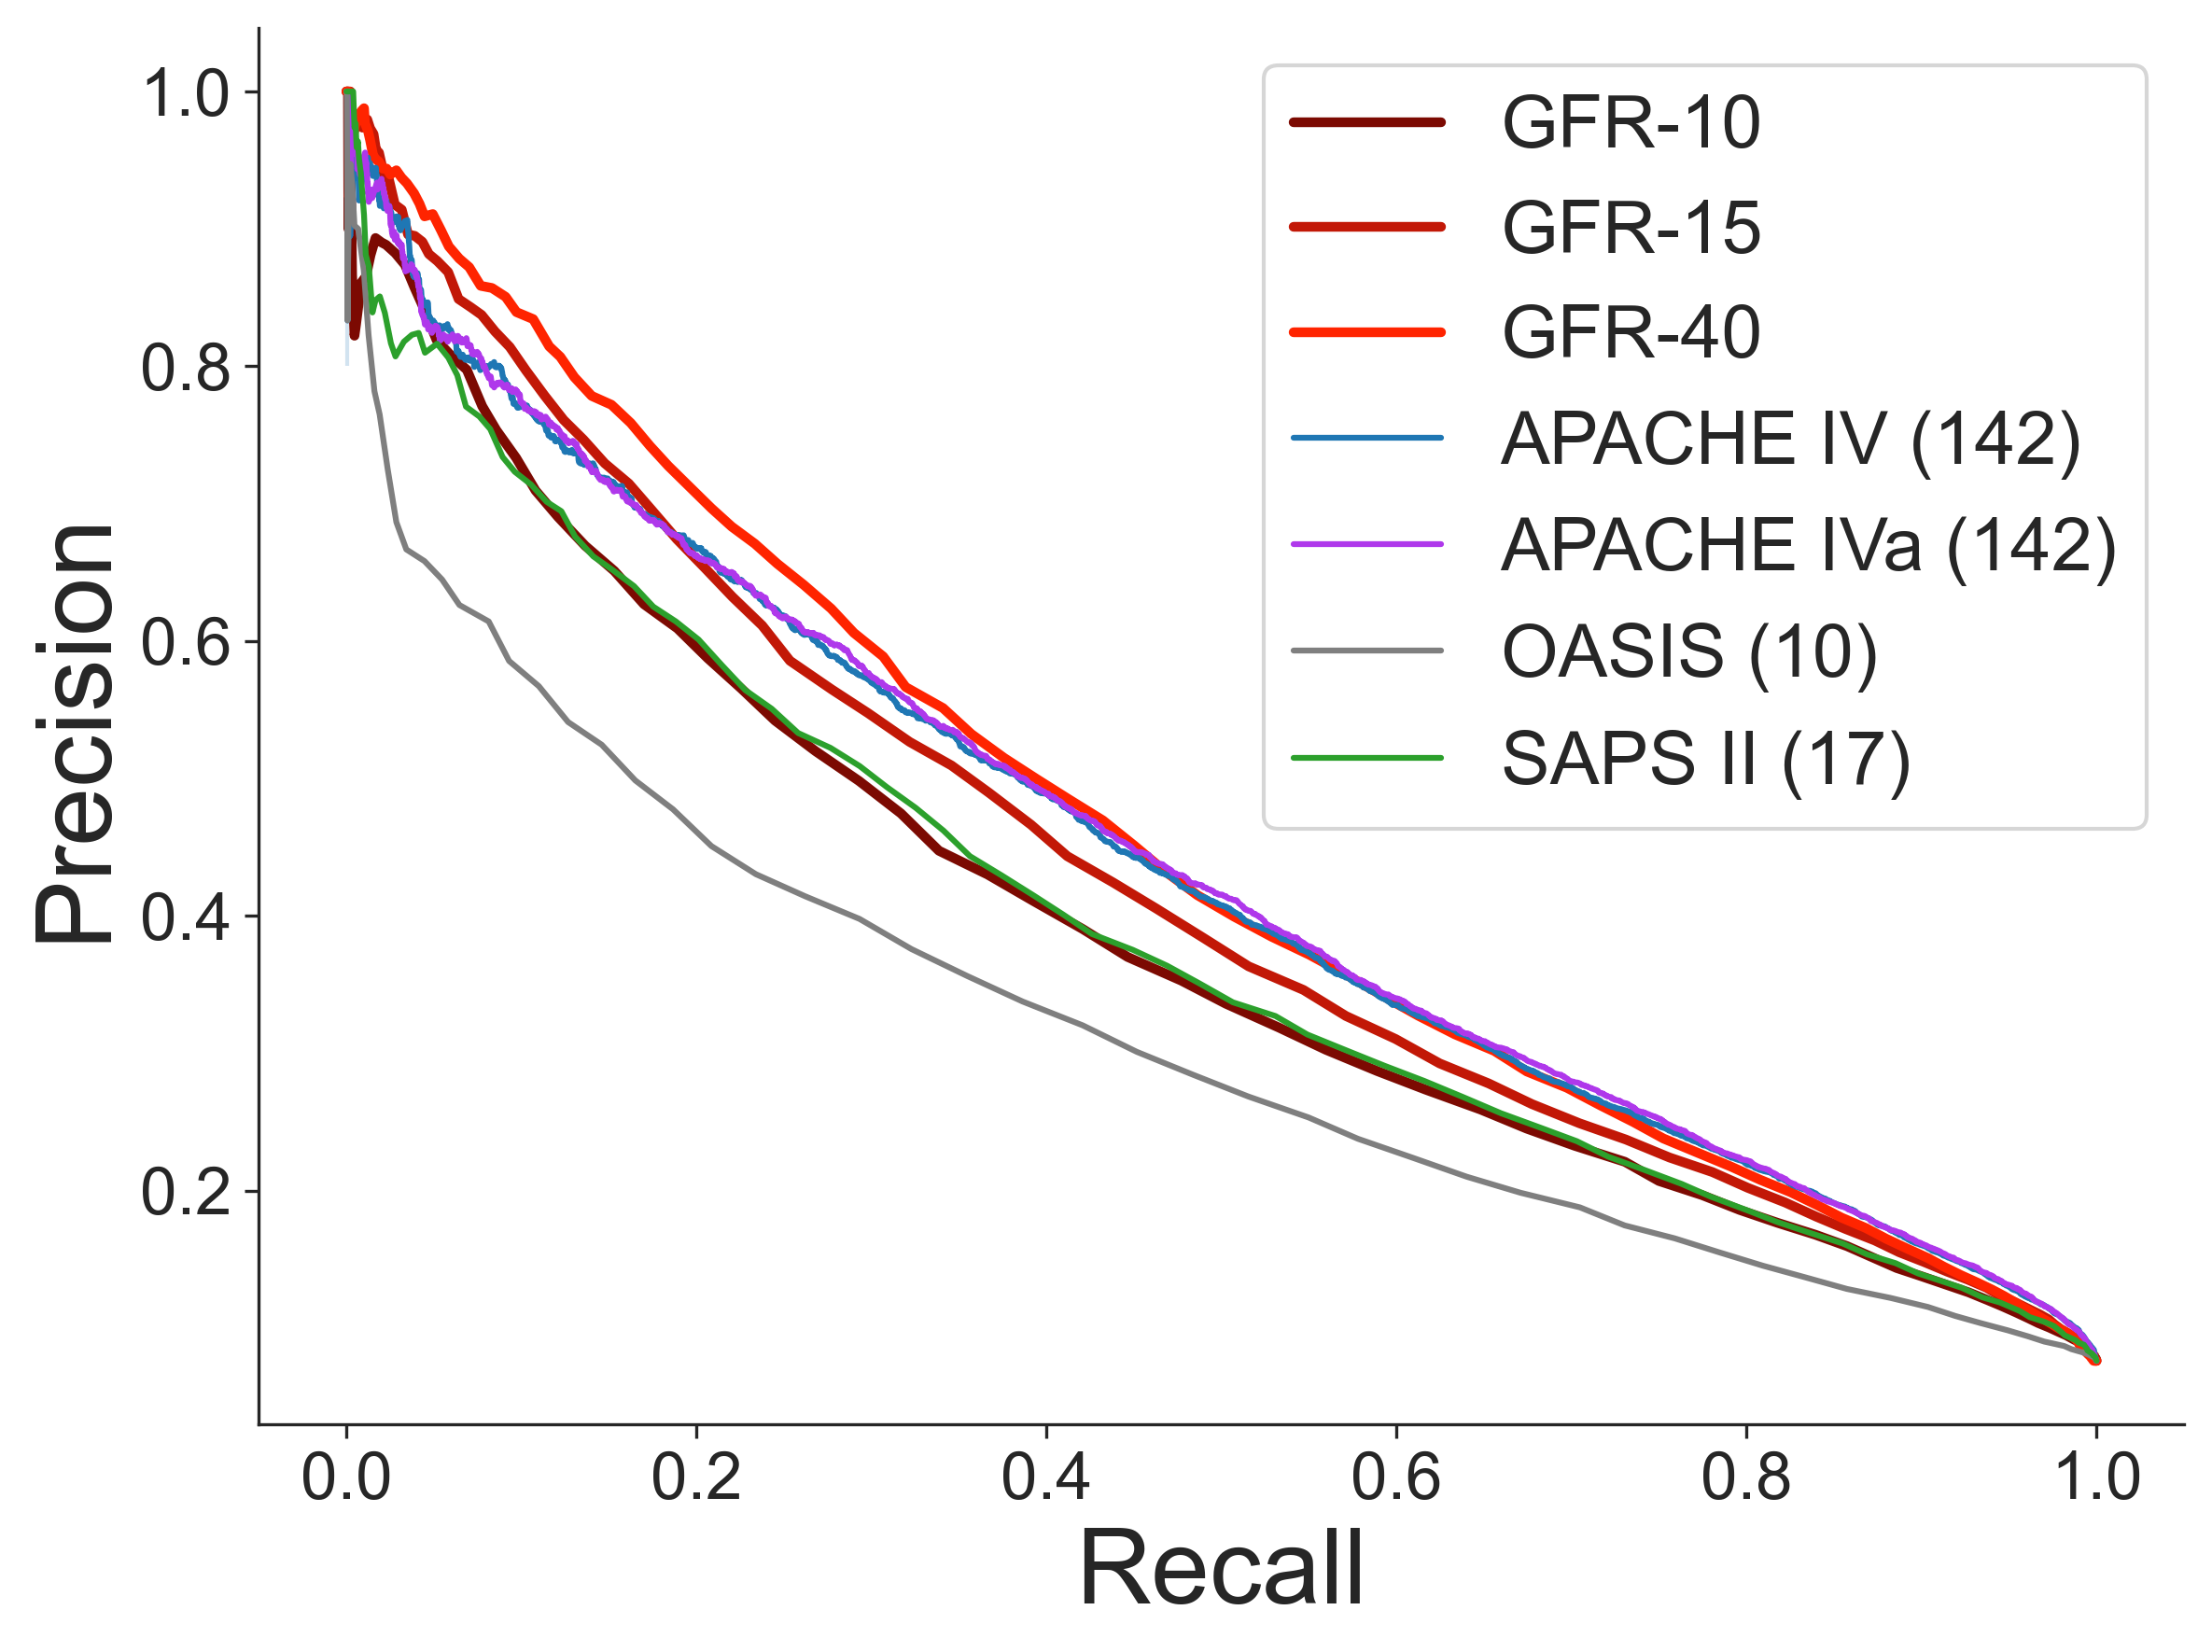

In [5]:
def plot_roc_pr_baselines(figsize=(8, 6), linewidth=1, linewidth_reduce=0.2, linewidth_add=1, fontsize=14, alternative_alpha=1, alternative_linestyle='solid'):
    sns.set_style("ticks")
    fig, axes = plt.subplots(figsize=figsize)
    sns.lineplot(x=np.linspace(0, 1), y=np.linspace(0, 1), color="black", linestyle="--", linewidth=1, ax=axes)
    names = iter([10, 15, 40])
    seaborn_color = sns.color_palette()
    tab_color = sns.color_palette("tab10")
    # colors = ['limegreen', 'dodgerblue', 'red', seaborn_color[1], seaborn_color[4], seaborn_color[5], seaborn_color[-1]]
    # colors = [seaborn_color[2], seaborn_color[0], seaborn_color[3], seaborn_color[-1], seaborn_color[4], seaborn_color[5], seaborn_color[1]]
    colors = ["#7C0A02", "#C21807", "#FF2400", tab_color[0], "#AF38EB", tab_color[-3], tab_color[2]]
    color_iter = iter(colors)

    for name in ['fasterrisk-10', 'fasterrisk-15', 'fasterrisk-40']:
        stats = fasterrisk_dict[name]
        fpr, tpr = stats['fpr'], stats['tpr']
        auroc = stats['auroc']
        sns.lineplot(x=fpr, y=tpr, linewidth=linewidth+linewidth_add, alpha=1, label=f"GFR-{next(names)}, {auroc:.3f}", ax=axes, color=next(color_iter))
        # axes.scatter(fpr, tpr, s=linewidth+linewidth_add, alpha=1, label=f"FR-{next(names)}, {auroc:.3f}", color=next(color_iter))

    for i, (model_name, stats) in enumerate(baselines_dict.items(), 1):
        fpr, tpr = stats['fpr'], stats['tpr']
        auroc = stats['auroc']
        if model_name == 'oasis_prob':
            sns.lineplot(x=fpr, y=tpr, linewidth=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}", ax=axes, color=next(color_iter), linestyle=alternative_linestyle)
            # axes.scatter(fpr, tpr, s=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}", color=next(color_iter))
        else:
            sns.lineplot(x=fpr, y=tpr, linewidth=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}, {auroc:.3f}", ax=axes, color=next(color_iter), linestyle=alternative_linestyle)
            # axes.scatter(fpr, tpr, s=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}, {auroc:.3f}", color=next(color_iter))
    
    axes.set_ylabel("True Positive Rate", fontsize=fontsize+2)
    axes.set_xlabel("False Positive Rate", fontsize=fontsize+2)
    axes.tick_params(axis='both', which='major', labelsize=fontsize-8)
    axes.get_legend().remove()
    sns.despine()
    plt.tight_layout()
    plt.savefig("roc_score_left.pdf", dpi=300, format='pdf')
    plt.close()
    
    sns.set_style("ticks")
    fig, axes = plt.subplots(figsize=figsize)
    names = iter([10, 15, 40])
    color_iter = iter(colors)
    for name in ['fasterrisk-10', 'fasterrisk-15', 'fasterrisk-40']:
        stats = fasterrisk_dict[name]
        precision, recall = stats['precision'], stats['recall']
        auprc = stats['auprc']
        sns.lineplot(x=recall, y=precision, linewidth=linewidth+linewidth_add, alpha=1, label=f"GFR-{next(names)}", ax=axes, color=next(color_iter))
        # axes.scatter(recall, precision, s=linewidth+linewidth_add, alpha=1, label=f"FR-{next(names)}", color=next(color_iter))

    for i, (model_name, stats) in enumerate(baselines_dict.items(), 1):
        precision, recall = stats['precision'], stats['recall']
        auprc = stats['auprc']
        if model_name == 'oasis_prob':
            sns.lineplot(x=recall, y=precision, linewidth=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}", ax=axes, color=next(color_iter), linestyle=alternative_linestyle)
            # axes.scatter(recall, precision, s=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}", color=next(color_iter))
        else:
            sns.lineplot(x=recall, y=precision, linewidth=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}", ax=axes, color=next(color_iter), linestyle=alternative_linestyle)
            # axes.scatter(recall, precision, s=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}", color=next(color_iter))
    
    axes.set_ylabel("Precision", fontsize=fontsize+2)
    axes.set_xlabel("Recall", fontsize=fontsize+2)
    axes.tick_params(axis='both', which='major', labelsize=fontsize-8)
    axes.legend(fontsize=fontsize-6)
    sns.despine()
    plt.tight_layout()
    plt.savefig("roc_score_right.pdf", dpi=300, format='pdf')
    # plt.show()

# plot_roc_pr_baselines(fontsize=21, linewidth=1.9, linewidth_reduce=0, linewidth_add=1.5, alternative_alpha=1)
plot_roc_pr_baselines(fontsize=25, linewidth=1.5, linewidth_reduce=0, linewidth_add=1, alternative_alpha=1, alternative_linestyle='-')

In [ ]:
def plot_roc_pr_baselines(figsize=(16, 24), linewidth=1, linewidth_reduce=0.2, linewidth_add=1, fontsize=14, alternative_alpha=1, alternative_linestyle='solid'):
    sns.set_style("ticks")
    fig, axes = plt.subplots(3, 2, figsize=figsize)
    names = iter([10, 15, 40])
    seaborn_color = sns.color_palette()
    tab_color = sns.color_palette("tab10")
    # colors = ['limegreen', 'dodgerblue', 'red', seaborn_color[1], seaborn_color[4], seaborn_color[5], seaborn_color[-1]]
    # colors = [seaborn_color[2], seaborn_color[0], seaborn_color[3], seaborn_color[-1], seaborn_color[4], seaborn_color[5], seaborn_color[1]]
    colors = ["#7C0A02", "#C21807", "#FF2400", tab_color[0], tab_color[1], tab_color[-3], tab_color[2]]
    color_iter = iter(colors)

    for i, name in enumerate(['fasterrisk-10', 'fasterrisk-15', 'fasterrisk-40']):
        stats = fasterrisk_dict[name]
        fpr, tpr = stats['fpr'], stats['tpr']
        auroc = stats['auroc']
        sns.lineplot(x=fpr, y=tpr, linewidth=linewidth+linewidth_add, alpha=1, label=f"FR-{next(names)}, {auroc:.3f}", ax=axes[i][0], color=next(color_iter))
        sns.lineplot(x=np.linspace(0, 1), y=np.linspace(0, 1), color="black", linestyle="--", linewidth=1, ax=axes[i][0])
        # axes[0].scatter(fpr, tpr, s=linewidth+linewidth_add, alpha=1, label=f"FR-{next(names)}, {auroc:.3f}", color=next(color_iter))

    for i, (model_name, stats) in enumerate(baselines_dict.items()):
        fpr, tpr = stats['fpr'], stats['tpr']
        auroc = stats['auroc']
        if model_name == 'oasis_prob':
            sns.lineplot(x=fpr, y=tpr, linewidth=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}", ax=axes[0][0], color=next(color_iter), linestyle=alternative_linestyle)
            # axes[0].scatter(fpr, tpr, s=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}", color=next(color_iter))
        elif model_name == 'sapsii_prob':
            sns.lineplot(x=fpr, y=tpr, linewidth=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}, {auroc:.3f}", ax=axes[1][0], color=next(color_iter), linestyle=alternative_linestyle)
        elif 'apache' in model_name:
            sns.lineplot(x=fpr, y=tpr, linewidth=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}, {auroc:.3f}", ax=axes[2][0], color=next(color_iter), linestyle=alternative_linestyle)
            # axes[0].scatter(fpr, tpr, s=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}, {auroc:.3f}", color=next(color_iter))
        
    names = iter([10, 15, 40])
    color_iter = iter(colors)
    for i, name in enumerate(['fasterrisk-10', 'fasterrisk-15', 'fasterrisk-40']):
        stats = fasterrisk_dict[name]
        precision, recall = stats['precision'], stats['recall']
        auprc = stats['auprc']
        sns.lineplot(x=recall, y=precision, linewidth=linewidth+linewidth_add, alpha=1, label=f"FR-{next(names)}", ax=axes[i][1], color=next(color_iter))
        # axes[1].scatter(recall, precision, s=linewidth+linewidth_add, alpha=1, label=f"FR-{next(names)}", color=next(color_iter))

    for i, (model_name, stats) in enumerate(baselines_dict.items()):
        precision, recall = stats['precision'], stats['recall']
        auprc = stats['auprc']
        if model_name == 'oasis_prob':
            sns.lineplot(x=recall, y=precision, linewidth=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}", ax=axes[0][1], color=next(color_iter), linestyle=alternative_linestyle)
            # axes[1].scatter(recall, precision, s=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}", color=next(color_iter))
        elif model_name == 'sapsii_prob':
            sns.lineplot(x=recall, y=precision, linewidth=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}", ax=axes[1][1], color=next(color_iter), linestyle=alternative_linestyle)
        elif 'apache' in model_name:
            sns.lineplot(x=recall, y=precision, linewidth=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}", ax=axes[2][1], color=next(color_iter), linestyle=alternative_linestyle)
            # axes[1].scatter(recall, precision, s=linewidth-linewidth_reduce, alpha=alternative_alpha, label=f"{get_better_name(model_name)}", color=next(color_iter))
    
    for i in range(3):
        axes[i][0].set_ylabel("True Positive Rate", fontsize=fontsize)
        axes[i][0].set_xlabel("False Positive Rate", fontsize=fontsize)
        axes[i][0].tick_params(axis='both', which='major', labelsize=fontsize)
        axes[i][0].get_legend().remove()
        
        axes[i][1].set_ylabel("Precision", fontsize=fontsize)
        axes[i][1].set_xlabel("Recall", fontsize=fontsize)
        axes[i][1].tick_params(axis='both', which='major', labelsize=fontsize)
        axes[i][1].legend(fontsize=fontsize-3)
    
    plt.tight_layout()
    # plt.subplots_adjust(wspace=0.2, hspace=1)
    # plt.show()

# plot_roc_pr_baselines(fontsize=21, linewidth=1.9, linewidth_reduce=0, linewidth_add=1.5, alternative_alpha=1)
plot_roc_pr_baselines(fontsize=21, linewidth=1.5, linewidth_reduce=0, linewidth_add=1, alternative_alpha=1, alternative_linestyle='-')
plt.savefig('roc_score.pdf', dpi=300, format='pdf')

In [ ]:
sns.set_style("white")
sns.lineplot(x=np.linspace(0, 1, 100), y=np.linspace(0, 1, 100), color="black", linestyle="--", linewidth=1)
palatte = sns.color_palette()

names = iter([10, 15, 40])

fpr, tpr = fasterrisk_dict['fasterrisk-14']['fpr'], fasterrisk_dict['fasterrisk-14']['tpr']
auroc = fasterrisk_dict['fasterrisk-14']['auroc']
ax = sns.lineplot(x=fpr, y=tpr, linewidth=1.5, alpha=1, label=f"FasterRisk (14), {auroc:.3f}")
ax.figure.set_size_inches(6, 6)

fpr, tpr = fasterrisk_dict['fasterrisk-oasis']['fpr'], fasterrisk_dict['fasterrisk-oasis']['tpr']
auroc = fasterrisk_dict['fasterrisk-oasis']['auroc']
ax = sns.lineplot(x=fpr, y=tpr, linewidth=1.5, alpha=1, label=f"FasterRisk (OASIS), {auroc:.3f}")

# for i, (model_name, stats) in enumerate(baselines_dict.items(), 1):
#     fpr, tpr = stats['fpr'], stats['tpr']
#     auroc = stats['auroc']
#     if i == 4:
#         ax = sns.lineplot(x=fpr, y=tpr, linewidth=0.8, alpha=0.8, label=f"{get_better_name(model_name)}, {auroc:.3f}")
#     ax = sns.lineplot(x=fpr, y=tpr, linewidth=0.8, alpha=0.8)    
#     ax.figure.set_size_inches(6, 6)

for i, (model_name, stats) in enumerate(oasis_dict.items(), 1):
    fpr, tpr = stats['fpr'], stats['tpr']
    auroc = stats['auroc']
    ax = sns.lineplot(x=fpr, y=tpr, linewidth=0.8, alpha=0.5, label=f"OASIS+ {get_better_name(model_name)}, {auroc:.3f}")
    ax.figure.set_size_inches(6, 6)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=12, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [ ]:
def plot_roc_pr_baselines(figsize=(16, 8), linewidth=1, fontsize=14):
    sns.set_style("ticks")
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    sns.lineplot(x=np.linspace(0, 1), y=np.linspace(0, 1, 100), color="black", linestyle="--", linewidth=linewidth, ax=axes[0])
    names = iter([10, 15, 40])

    for name in ['fasterrisk-10', 'fasterrisk-15', 'fasterrisk-40']:
        stats = fasterrisk_dict[name]
        fpr, tpr = stats['fpr'], stats['tpr']
        auroc = stats['auroc']
        sns.lineplot(x=fpr, y=tpr, linewidth=linewidth+0.5, alpha=1, label=f"FasterRisk ({next(names)}), {auroc:.3f}", ax=axes[0])

    for i, (model_name, stats) in enumerate(baselines_dict.items(), 1):
        fpr, tpr = stats['fpr'], stats['tpr']
        auroc = stats['auroc']
        sns.lineplot(x=fpr, y=tpr, linewidth=linewidth-0.2, alpha=0.8, label=f"{get_better_name(model_name)}, {auroc:.3f}", ax=axes[0])
        
    names = iter([10, 15, 40])
    for name in ['fasterrisk-10', 'fasterrisk-15', 'fasterrisk-40']:
        stats = fasterrisk_dict[name]
        precision, recall = stats['precision'], stats['recall']
        auprc = stats['auprc']
        sns.lineplot(x=recall, y=precision, linewidth=linewidth+0.5, alpha=1, label=f"FasterRisk ({next(names)}), {auprc:.3f}", ax=axes[1])

    for i, (model_name, stats) in enumerate(baselines_dict.items(), 1):
        precision, recall = stats['precision'], stats['recall']
        auprc = stats['auprc']
        sns.lineplot(x=recall, y=precision, linewidth=linewidth-0.2, alpha=0.8, label=f"{get_better_name(model_name)}, {auprc:.3f}", ax=axes[1])
        
    axes[0].set_ylabel("True Positive Rate", fontsize=fontsize)
    axes[0].set_xlabel("False Positive Rate", fontsize=fontsize)
    axes[0].tick_params(axis='both', which='major', labelsize=fontsize)
    axes[0].get_legend().remove()
    
    axes[1].set_ylabel("Precision", fontsize=fontsize)
    axes[1].set_xlabel("Recall", fontsize=fontsize)
    axes[1].tick_params(axis='both', which='major', labelsize=fontsize)
    axes[1].legend(fontsize=fontsize-3)
    plt.tight_layout()
    plt.show()

plot_roc_pr_baselines()

In [ ]:
sns.set_style("ticks")
palatte = sns.color_palette()

names = iter([10, 15, 40])

for name in ['fasterrisk-10', 'fasterrisk-15', 'fasterrisk-40']:
    stats = fasterrisk_dict[name]
    precision, recall = stats['precision'], stats['recall']
    auprc = stats['auprc']
    ax = sns.lineplot(x=recall, y=precision, linewidth=1.5, alpha=1, label=f"FasterRisk ({next(names)}), {auprc:.3f}")
    ax.figure.set_size_inches(6, 6)

for i, (model_name, stats) in enumerate(baselines_dict.items(), 1):
    precision, recall = stats['precision'], stats['recall']
    auprc = stats['auprc']
    ax = sns.lineplot(x=recall, y=precision, linewidth=0.8, alpha=0.8, label=f"{get_better_name(model_name)}, {auprc:.3f}")
    ax.figure.set_size_inches(6, 6)

plt.xscale(15)
plt.yscale(15)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(fontsize=12, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## PR

In [ ]:
sns.set_style("white")
palatte = sns.color_palette()

names = iter([10, 15, 40])

precision, recall = fasterrisk_dict['fasterrisk-14']['precision'], fasterrisk_dict['fasterrisk-14']['recall']
auprc = fasterrisk_dict['fasterrisk-14']['auprc']
ax = sns.lineplot(x=recall, y=precision, linewidth=1.5, alpha=1, label=f"FasterRisk (14), {auprc:.3f}", errorbar=None)
ax.figure.set_size_inches(6, 6)

precision, recall = fasterrisk_dict['fasterrisk-oasis']['precision'], fasterrisk_dict['fasterrisk-oasis']['recall']
auprc = fasterrisk_dict['fasterrisk-oasis']['auprc']
ax = sns.lineplot(x=recall, y=precision, linewidth=1.5, alpha=1, label=f"FasterRisk (OASIS), {auprc:.3f}", errorbar=None)

# for i, (model_name, stats) in enumerate(baselines_dict.items(), 1):
#     fpr, tpr = stats['fpr'], stats['tpr']
#     auroc = stats['auroc']
#     if i == 4:
#         ax = sns.lineplot(x=fpr, y=tpr, linewidth=0.8, alpha=0.8, label=f"{get_better_name(model_name)}, {auroc:.3f}")
#     ax = sns.lineplot(x=fpr, y=tpr, linewidth=0.8, alpha=0.8)    
#     ax.figure.set_size_inches(6, 6)

for i, (model_name, stats) in enumerate(oasis_dict.items(), 1):
    precision, recall = stats['precision'], stats['recall']
    auprc = stats['auprc']
    ax = sns.lineplot(x=recall, y=precision, linewidth=0.8, alpha=0.5, label=f"OASIS+ {get_better_name(model_name)}, {auprc:.3f}", errorbar=None)
    ax.figure.set_size_inches(6, 6)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(fontsize=12, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## Calibration

OASIS+

In [ ]:
sns.set_style("white")
palatte = sns.color_palette()

names = iter([10, 15, 40])

true_prob, pred_prob = fasterrisk_dict['fasterrisk-15']['true_prob'], fasterrisk_dict['fasterrisk-15']['pred_prob']
h_stat = fasterrisk_dict['fasterrisk-15']['h-stat']
sns.lineplot(x=np.linspace(0,1), y=np.linspace(0,1), color='black', linestyle='--', linewidth=1)
ax = sns.lineplot(x=pred_prob, y=true_prob, linewidth=1.5, alpha=1, label=f"FasterRisk (15), {h_stat:.2f}", marker='s')
ax.figure.set_size_inches(6, 6)

# for i, (model_name, stats) in enumerate(baselines_dict.items(), 1):
#     fpr, tpr = stats['fpr'], stats['tpr']
#     auroc = stats['auroc']
#     if i == 4:
#         ax = sns.lineplot(x=fpr, y=tpr, linewidth=0.8, alpha=0.8, label=f"{get_better_name(model_name)}, {auroc:.3f}")
#     ax = sns.lineplot(x=fpr, y=tpr, linewidth=0.8, alpha=0.8)    
#     ax.figure.set_size_inches(6, 6)

for i, (model_name, stats) in enumerate(oasis_dict.items(), 1):
    true_prob, pred_prob = stats['true_prob'], stats['pred_prob']
    h_stat = stats['h-stat']
    ax = sns.lineplot(x=pred_prob, y=true_prob, linewidth=1, alpha=0.5, label=f"OASIS+ {get_better_name(model_name)}, {h_stat:.3f}", marker='s')
    ax.figure.set_size_inches(6, 6)

plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend(fontsize=12, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

severity of illness score

In [ ]:
sns.set_style("white")
palatte = sns.color_palette()

names = iter([10, 15, 40])
sns.lineplot(x=np.linspace(0,1), y=np.linspace(0,1), color='black', linestyle='--', linewidth=1)
for model_name, stats in fasterrisk_dict.items():
    true_prob, pred_prob = stats['true_prob'], stats['pred_prob']
    h_stat = stats['h-stat']
    ax = sns.lineplot(x=pred_prob, y=true_prob, linewidth=1.5, alpha=1, label=f"FasterRisk ({next(names)}), {h_stat:.2f}", marker='s')
    ax.figure.set_size_inches(6, 6)

for i, (model_name, stats) in enumerate(baselines_dict.items(), 1):
    true_prob, pred_prob = stats['true_prob'], stats['pred_prob']
    h_stat = stats['h-stat']
    ax = sns.lineplot(x=pred_prob, y=true_prob, linewidth=1, alpha=0.5, label=f"{get_better_name(model_name)}, {h_stat:.2f}", marker='s')
    ax.figure.set_size_inches(6, 6)

plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend(fontsize=12, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

union 49

In [ ]:
sns.set_style("white")
palatte = sns.color_palette()

names = iter([10, 15, 40])
sns.lineplot(x=np.linspace(0,1), y=np.linspace(0,1), color='black', linestyle='--', linewidth=1)
true_prob, pred_prob = fasterrisk_dict['fasterrisk-40']['true_prob'], fasterrisk_dict['fasterrisk-40']['pred_prob']
h_stat = fasterrisk_dict['fasterrisk-40']['h-stat']
ax = sns.lineplot(x=pred_prob, y=true_prob, linewidth=1.5, alpha=1, label=f"FasterRisk (40), {h_stat:.2f}", marker='s')
ax.figure.set_size_inches(6, 6)

# for i, (model_name, stats) in enumerate(baselines_dict.items(), 1):
#     fpr, tpr = stats['fpr'], stats['tpr']
#     auroc = stats['auroc']
#     if i == 4:
#         ax = sns.lineplot(x=fpr, y=tpr, linewidth=0.8, alpha=0.8, label=f"{get_better_name(model_name)}, {auroc:.3f}")
#     ax = sns.lineplot(x=fpr, y=tpr, linewidth=0.8, alpha=0.8)    
#     ax.figure.set_size_inches(6, 6)

for i, (model_name, stats) in enumerate(union_dict.items(), 1):
    true_prob, pred_prob = stats['true_prob'], stats['pred_prob']
    h_stat = stats['h-stat']
    ax = sns.lineplot(x=pred_prob, y=true_prob, linewidth=1, alpha=0.5, label=f"{get_better_name(model_name)} (49), {h_stat:.3f}", marker='s')
    ax.figure.set_size_inches(6, 6)

plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend(fontsize=12, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()